## 4 Лабораторная работа 
Саркисян Артем Оганнесович НПМ-01-22

## 1 Задание

Binary Classification - Train Accuracy: 1.00, Test Accuracy: 0.97


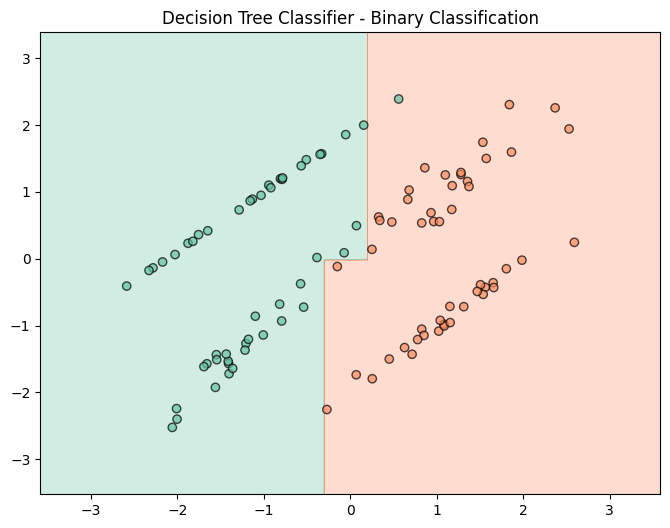

Moons - Train Accuracy: 1.00, Test Accuracy: 0.93


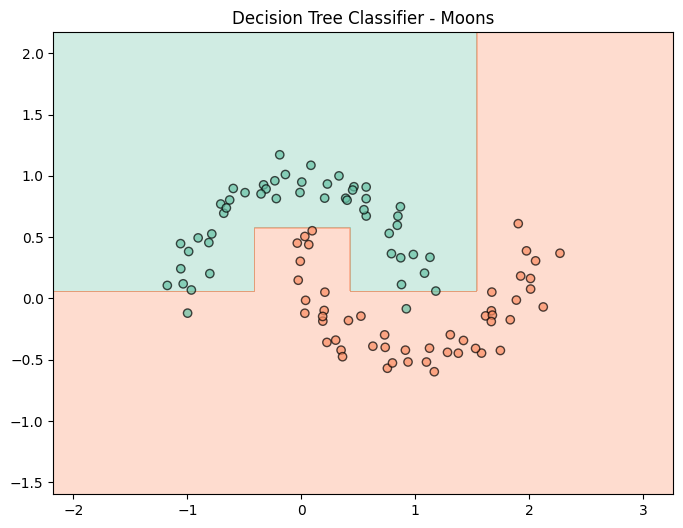

Circles - Train Accuracy: 1.00, Test Accuracy: 0.90


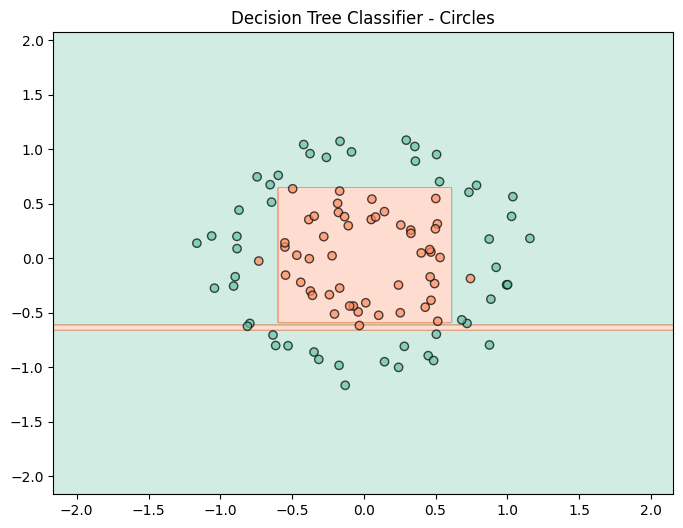

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Функция для визуализации разделяющих границ
def visualize_decision_boundary(model, data, labels):
    step_size = 0.01
    # Изменяем цветовую палитру на более яркую
    color_palette = sns.color_palette("Set2", n_colors=len(np.unique(labels)))
    color_map = ListedColormap(color_palette)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, step_size),
                                  np.arange(y_min, y_max, step_size))
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    predictions = model.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
    predictions = predictions.reshape(grid_x.shape)
    
    plt.contourf(grid_x, grid_y, predictions, cmap=color_map, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=color_map,
                alpha=0.7, edgecolors='black', linewidths=1)

# Создание наборов данных
data_sets = {
    'Binary Classification': make_classification(n_samples=100, n_features=2, n_classes=2,
                                                n_informative=2, n_redundant=0,
                                                random_state=42),
    'Moons': make_moons(n_samples=100, noise=0.1, random_state=42),
    'Circles': make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
}

# Обучение модели и её оценка
for dataset_name, (features, labels) in data_sets.items():
    # Деление на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                        test_size=0.3,
                                                        random_state=42)

    # Обучение классификатора
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Предсказания на обучающей и тестовой выборках
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Оценка точности
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"{dataset_name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

    # Визуализация разделяющей границы
    plt.figure(figsize=(8, 6))
    visualize_decision_boundary(model, features, labels)
    plt.title(f'Decision Tree Classifier - {dataset_name}')
    plt.show()


Вывод:
Модель дерева решений показывает хорошие результаты на линейных или почти линейных данных, как в случае с набором "Classification". Однако, когда речь идет о более сложных формах, таких как "Moons" и "Circles", её эффективность может значительно снизиться.
На всех трех графиках наблюдается риск переобучения при использовании дерева решений. Это особенно заметно в случаях с более сложными формами, где модель стремится подстроиться под каждую деталь обучающей выборки.
Графики наглядно демонстрируют работу модели и подчеркивают важность выбора подходящего алгоритма для конкретной задачи классификации. В ситуациях с нелинейными данными стоит рассмотреть альтернативные методы, такие как SVM с ядровыми функциями или ансамблевые подходы, например, Random Forest.

## 2 Задание

Circles | Max Depth: 1 | Min Samples Leaf: 1 => Train Accuracy: 0.73, Test Accuracy: 0.47
Circles | Max Depth: 1 | Min Samples Leaf: 5 => Train Accuracy: 0.73, Test Accuracy: 0.47
Circles | Max Depth: 3 | Min Samples Leaf: 1 => Train Accuracy: 0.89, Test Accuracy: 0.73
Circles | Max Depth: 3 | Min Samples Leaf: 5 => Train Accuracy: 0.86, Test Accuracy: 0.80
Circles | Max Depth: 5 | Min Samples Leaf: 1 => Train Accuracy: 0.97, Test Accuracy: 0.77
Circles | Max Depth: 5 | Min Samples Leaf: 5 => Train Accuracy: 0.87, Test Accuracy: 0.90
Moons | Max Depth: 1 | Min Samples Leaf: 1 => Train Accuracy: 0.84, Test Accuracy: 0.80
Moons | Max Depth: 1 | Min Samples Leaf: 5 => Train Accuracy: 0.84, Test Accuracy: 0.80
Moons | Max Depth: 3 | Min Samples Leaf: 1 => Train Accuracy: 0.91, Test Accuracy: 0.93
Moons | Max Depth: 3 | Min Samples Leaf: 5 => Train Accuracy: 0.89, Test Accuracy: 0.80
Moons | Max Depth: 5 | Min Samples Leaf: 1 => Train Accuracy: 1.00, Test Accuracy: 0.87
Moons | Max Depth: 5

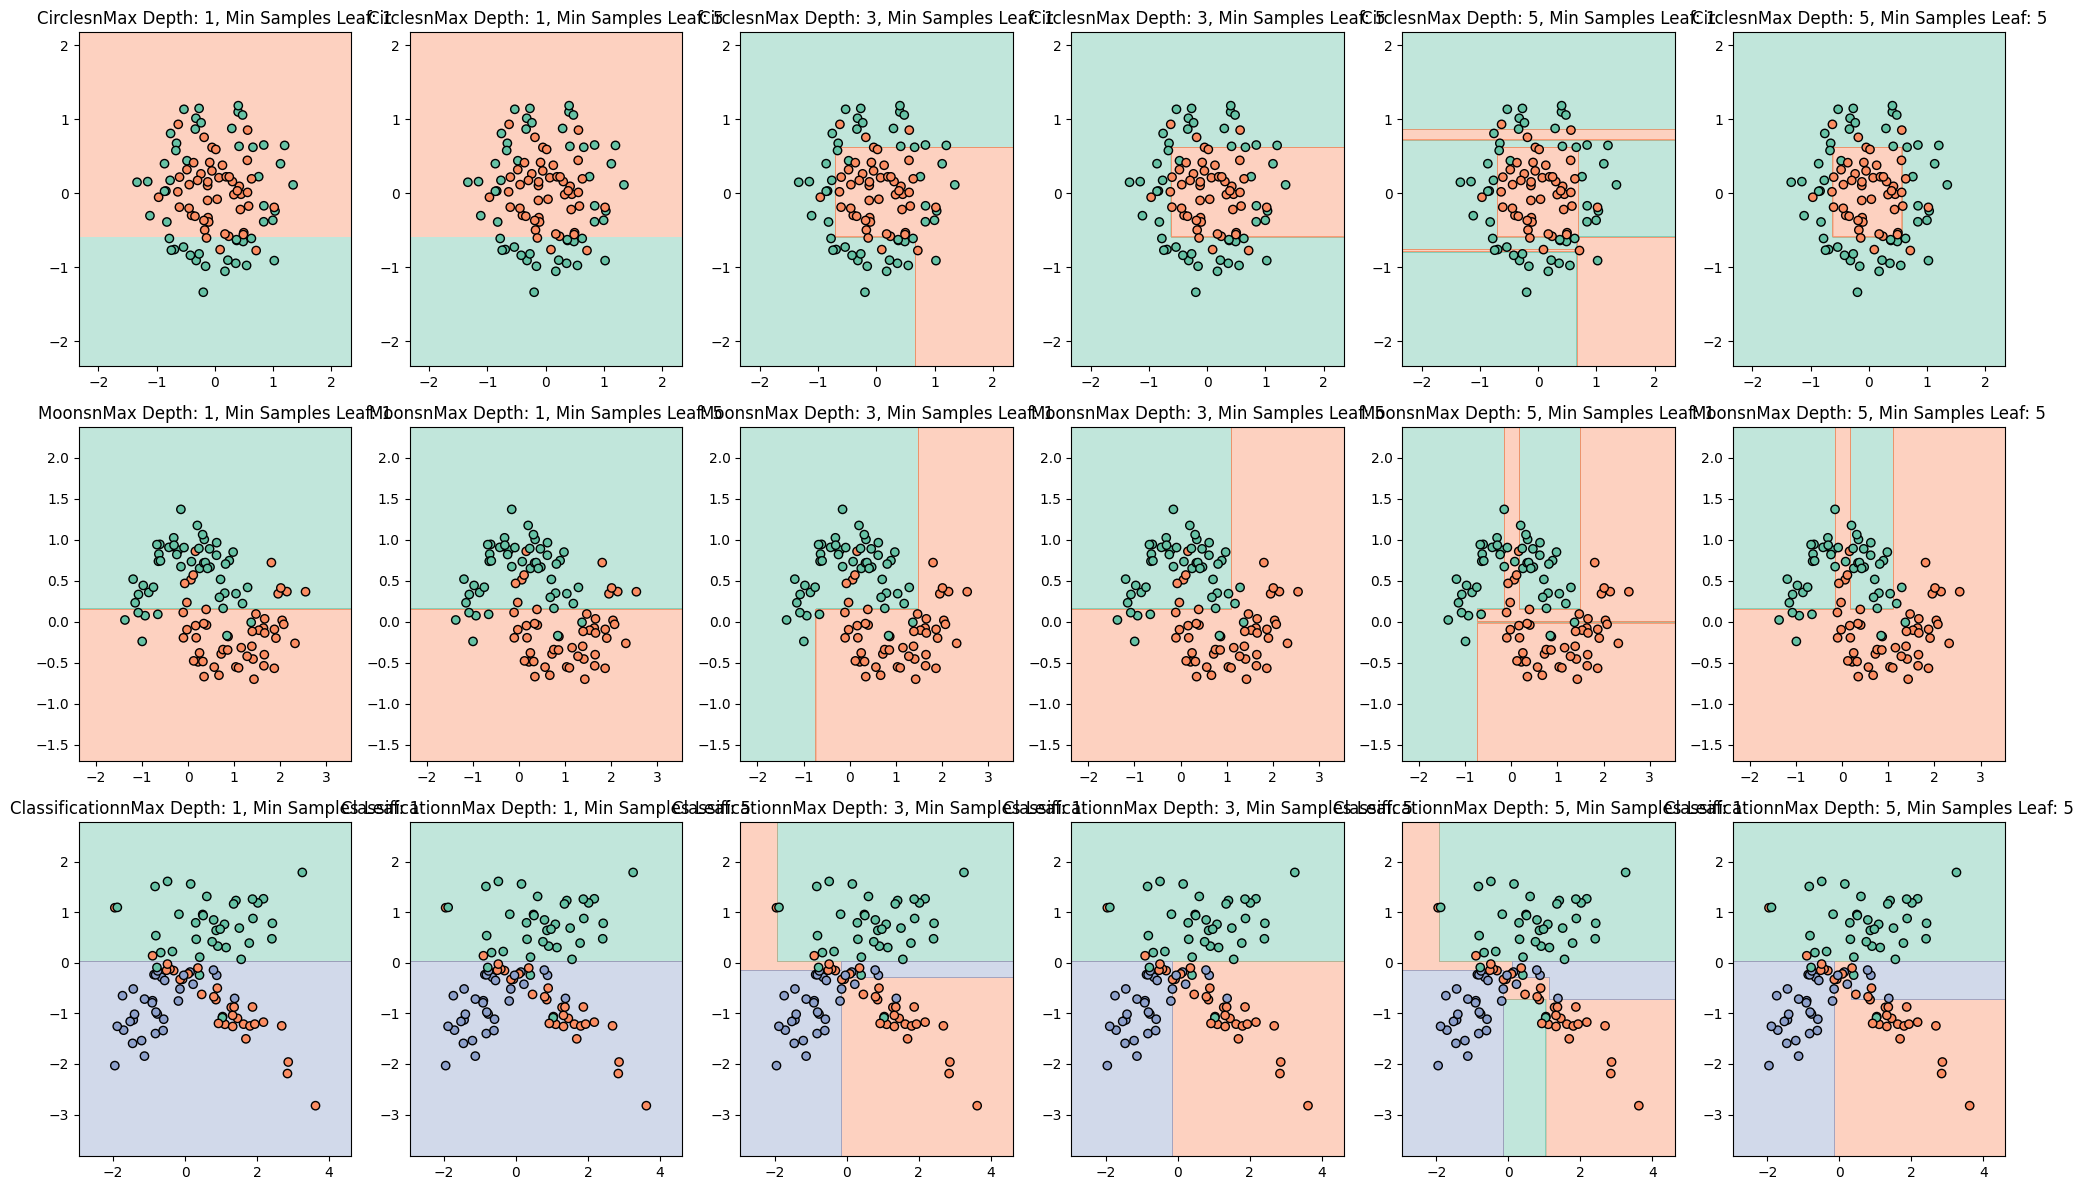

In [11]:
# Генерация датасетов
def generate_datasets():
    return {
        "Circles": make_circles(noise=0.2, factor=0.5, random_state=42),
        "Moons": make_moons(noise=0.2, random_state=42),
        "Classification": make_classification(n_classes=3, n_clusters_per_class=1,
                                              n_features=2, class_sep=.8,
                                              random_state=3, n_redundant=0)
    }

# Функция для построения разделяющей поверхности с измененными цветами
def plot_decision_surface(clf, X, y):
    plot_step = 0.01
    # Используем другую палитру цветов
    palette = sns.color_palette("Set2", n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)

    # Определение границ графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создание сетки для предсказаний
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Предсказания на сетке
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение контурного графика разделяющей поверхности
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)

    # Отображение исходных данных
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', linewidths=1)

# Функция для обучения и оценки модели с различными гиперпараметрами
def evaluate_models(datasets):
    max_depths = [1, 3, 5]
    min_samples_leaves = [1, 5]

    plt.figure(figsize=(20, 12))

    for i, (name, (X, y)) in enumerate(datasets.items()):
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.3,
                                                            random_state=42)

        for j in range(len(max_depths)):
            for k in range(len(min_samples_leaves)):
                max_depth = max_depths[j]
                min_samples_leaf = min_samples_leaves[k]

                # Обучение решающего дерева с заданными гиперпараметрами
                clf = DecisionTreeClassifier(max_depth=max_depth,
                                              min_samples_leaf=min_samples_leaf,
                                              random_state=42)
                clf.fit(X_train, y_train)

                # Оценка точности на обучающих и тестовых данных
                train_accuracy = accuracy_score(y_train, clf.predict(X_train))
                test_accuracy = accuracy_score(y_test, clf.predict(X_test))

                print(f"{name} | Max Depth: {max_depth} | Min Samples Leaf: {min_samples_leaf} => "
                      f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

                # Построение разделяющей поверхности в подграфике
                plt.subplot(len(datasets), len(max_depths) * len(min_samples_leaves),
                             i * len(max_depths) * len(min_samples_leaves) + j * len(min_samples_leaves) + k + 1)
                plot_decision_surface(clf, np.vstack((X_train, X_test)),
                                      np.hstack((y_train, y_test)))
                plt.title(f'{name}nMax Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}')

    plt.tight_layout()
    plt.show()

# Основной блок программы
if __name__ == "__main__":
    datasets = generate_datasets()
    evaluate_models(datasets)

Вывод:

Увеличение значения max_depth позволяет модели лучше захватывать сложные закономерности в данных, однако это также повышает риск переобучения, когда модель начинает подстраиваться под шум в обучающей выборке. 
Параметр min_samples_leaf служит для контроля сложности модели. Увеличение его значения может снизить вероятность переобучения, но при слишком высоких значениях существует риск недообучения, когда модель не способна адекватно захватить структуру данных.
Для линейно разделимых данных (например, в случае простых классов) решающее дерево может демонстрировать хорошую производительность даже при низких значениях max_depth. 
Однако для нелинейных задач, таких как "Circles" и "Moons", требуется более высокая сложность модели, чтобы добиться качественных результатов.
Графики позволяют интуитивно осознать, как решающее дерево принимает решения о классификации на основе входных данных. Они подчеркивают важность правильного выбора гиперпараметров для достижения оптимальной эффективности модели.

## 3 Задание 

In [13]:
from collections import Counter

def calculate_gini(class_counts, total_count):
    """Вычисляет значение критерия Джини на основе счетчиков классов."""
    return 1 - sum((count / total_count) ** 2 for count in class_counts.values())

def find_best_split(feature_vector, target_vector):
    """
    Находит лучший порог для разделения данных по критерию Джини.

    :param feature_vector: Вектор значений признака.
    :param target_vector: Вектор классов объектов.

    :return thresholds: Отсортированный вектор со всеми возможными порогами.
    :return ginis: Вектор со значениями критерия Джини для каждого порога.
    :return threshold_best: Оптимальный порог.
    :return gini_best: Оптимальное значение критерия Джини.
    """
    unique_values = np.unique(feature_vector)
    
    if len(unique_values) < 2:
        return [], [], None, None

    total_count = len(target_vector)
    class_counts = Counter(target_vector)
    
    initial_gini = calculate_gini(class_counts, total_count)

    thresholds, ginis = [], []

    for i in range(len(unique_values) - 1):
        threshold = (unique_values[i] + unique_values[i + 1]) / 2
        left_mask = feature_vector < threshold
        right_mask = ~left_mask

        if np.any(left_mask) and np.any(right_mask):
            left_counts = Counter(target_vector[left_mask])
            right_counts = Counter(target_vector[right_mask])

            left_size = left_mask.sum()
            right_size = right_mask.sum()

            left_gini = calculate_gini(left_counts, left_size)
            right_gini = calculate_gini(right_counts, right_size)

            weighted_gini = (left_size / total_count) * left_gini + (right_size / total_count) * right_gini

            thresholds.append(threshold)
            ginis.append(weighted_gini)

    if ginis:
        gini_best_index = np.argmin(ginis)
        threshold_best = thresholds[gini_best_index]
        gini_best = ginis[gini_best_index]

        return np.array(thresholds), np.array(ginis), threshold_best, gini_best

    return [], [], None, None


1. Сначала мы извлекаем уникальные значения из вектора признаков feature_vector. Если уникальных значений меньше двух, функция сразу возвращает пустые массивы.
2. Мы создаем списки для хранения пороговых значений и соответствующих им показателей критерия Джини. Также подсчитываем общее количество объектов в выборке и их классы с помощью счетчика.
3. Вычисляем значение критерия Джини для всего набора данных, чтобы иметь отправную точку для дальнейших сравнений.
4. Итерация по уникальным значениям:
    
   1)Для каждой пары соседних уникальных значений мы находим среднее значение, которое будет использоваться в качестве порога.

   2)Создаем маски, чтобы разделить данные на левую и правую подвыборки.

   3)Проверяем, что обе подвыборки содержат хотя бы один объект.

   4)Подсчитываем количество объектов в каждой из подвыборок и рассчитываем критерий Джини для этих подвыборок.

   5)Вычисляем общий взвешенный критерий Джини для текущего порога, учитывая размер каждой подвыборки.
6. В конце функции мы возвращаем отсортированные массивы порогов и значений критерия Джини, а также лучший порог и соответствующее ему значение критерия Джини.

## 5 Задание

**Выбор признака для разделения выборки**

Анализ кривых значений критерия Джини:

При рассмотрении кривых можно заметить, что признак с минимальным значением критерия Джини в определённом диапазоне порогов является наилучшим для разделения выборки на два поддерева. Низкое значение индекса Джини указывает на более чёткое различие между классами. Если выбранный признак демонстрирует ясное разделение классов на графиках рассеяния (например, точки классов 0 и 1 располагаются в разных областях графика), это подтверждает его пригодность для деления. Ясно видно, что классы хорошо отделены друг от друга, что соответствует низкому значению критерия Джини.

**Характеристика "хороших" признаков**

Форма кривой для качественных признаков:

Кривая для "хороших" признаков, обеспечивающих практически идеальное разделение выборки, обычно демонстрирует резкое снижение значения критерия Джини при небольших изменениях порога. Это говорит о том, что даже незначительные изменения в значении признака могут существенно улучшить разделение классов. Хорошие признаки будут иметь низкие значения индекса Джини на широком диапазоне порогов, что свидетельствует об их высокой эффективности в различении классов.

**Отличия кривых для признаков с трудным делением**

Плоская кривая:

Кривые для признаков, по которым практически невозможно провести деление, будут плоскими и высокими. Это указывает на то, что изменение порога не приводит к значительному улучшению разделения классов. Такие признаки будут иметь высокие значения индекса Джини при всех возможных порогах, что говорит о их неспособности эффективно различать классы.

## 6 Задание

In [3]:
def _fit_node(self, sub_X, sub_y, node):
    # Проверка на терминальный узел
    if len(set(sub_y)) == 1:  # Все объекты одного класса
        node["type"] = "terminal"
        node["class"] = sub_y[0]
        return

    # Проверка на возможность разбить выборку
    feature_best, threshold_best, gini_best, split = None, None, None, None
    for feature in range(sub_X.shape[1]):
        feature_type = self._feature_types[feature]

        if feature_type == "real":
            feature_vector = sub_X[:, feature]
        elif feature_type == "categorical":
            counts = Counter(sub_X[:, feature])
            clicks = Counter(sub_X[sub_y == 1, feature])
            ratio = {key: counts[key] / clicks[key] if key in clicks else 0 for key in counts}
            sorted_categories = sorted(ratio.items(), key=lambda x: x[1])
            categories_map = {cat: idx for idx, (cat, _) in enumerate(sorted_categories)}
            feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
        else:
            raise ValueError("Unknown feature type")

        thresholds, ginis = find_best_split(feature_vector, sub_y)
        if gini_best is None or (ginis is not None and ginis.max() > gini_best):
            gini_best = ginis.max()
            feature_best = feature
            threshold_best = thresholds[np.argmax(ginis)]
            split = feature_vector < threshold_best

    # Если не удалось найти подходящее разбиение
    if gini_best is None:
        node["type"] = "terminal"
        node["class"] = Counter(sub_y).most_common(1)[0][0]
        return

    # Создание узла и рекурсивный вызов для дочерних узлов
    node["type"] = "nonterminal"
    node["feature_split"] = feature_best
    node["threshold"] = threshold_best
    node["left_child"], node["right_child"] = {}, {}

    self._fit_node(sub_X[split], sub_y[split], node["left_child"])
    self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

def _predict_node(self, x, node):
    if node["type"] == "terminal":
        return node["class"]

    feature_value = x[node["feature_split"]]

    if self._feature_types[node["feature_split"]] == "real":
        if feature_value < node["threshold"]:
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])
    elif self._feature_types[node["feature_split"]] == "categorical":
        category_index = int(feature_value)
        if category_index < node["threshold"]:
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])
    else:
        raise ValueError("Unknown feature type")

1. Метод _fit_node:

   • Проверяет, является ли текущий узел терминальным (все объекты одного класса).
   
   • Ищет лучший признак и порог для разделения выборки на основе критерия Джини.
   
   • Для непрерывных признаков используется простой порог, а для категориальных — рассчитывается отношение классов.
   
   • Если не удаётся найти подходящее разбиение, узел становится терминальным с классом, наиболее часто встречающимся в выборке.
   
   • Рекурсивно вызывает себя для создания дочерних узлов.

3. Метод _predict_node:

   • Используется для предсказания класса для нового примера, основываясь на правилах, определённых в узлах дерева.
   
   • Определяет, следует ли двигаться к левому или правому дочернему узлу в зависимости от значения признака и его типа.

## 7 Задание 

In [6]:
# Загрузка данных
data = pd.read_csv('agaricus-lepiota.data', header=None)

# Определение признаков и целевой переменной
features = data.iloc[:, 1:]  # Все столбцы, кроме первого (целевой переменной)
target = data.iloc[:, 0]      # Первый столбец - целевая переменная

# Преобразование строковых категорий в числовые значения
label_encoders = {}
for column in features.columns:
    le = LabelEncoder()
    features.loc[:, column] = le.fit_transform(features[column])  # Используем .loc[]
    label_encoders[column] = le

# Разделение данных на обучающую и тестовую выборки (50% на обучение и 50% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)

# Обучение решающего дерева
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказание классов для тестовой выборки
y_pred = clf.predict(X_test)

# Вычисление точности (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


## 14 Задание

C:\Users\user\AppData\Local\Temp\ipykernel_12064\1099403619.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'x': 1, 'o': -1, 'b': 0}, inplace=True)


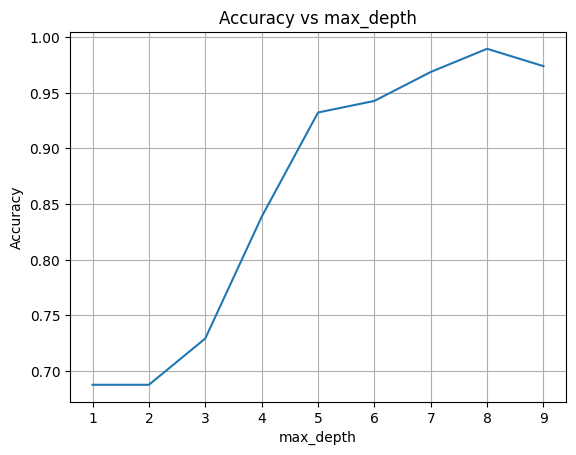

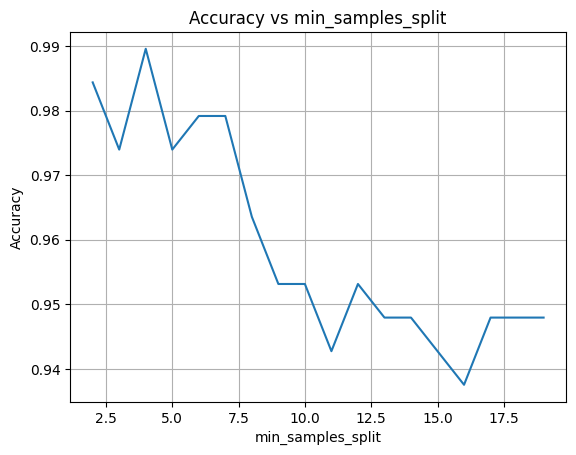

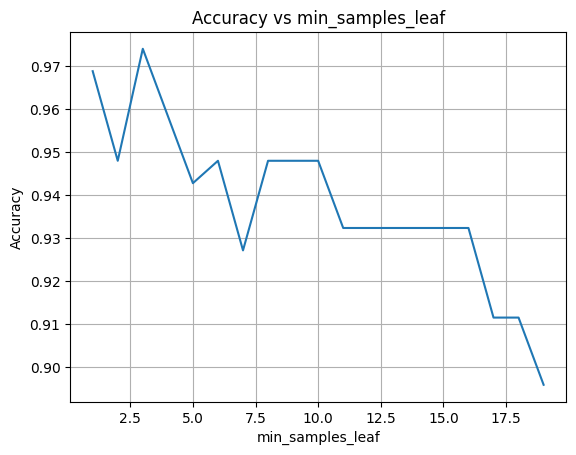

In [8]:
data = pd.read_csv('tic-tac-toe.data', header=None) 
data.columns = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'Class'] 
 
# Преобразование категориальных признаков в числовые 
data.replace({'x': 1, 'o': -1, 'b': 0}, inplace=True) 
 
# Разделение на признаки и целевую переменную 
X = data.iloc[:, :-1] 
y = data['Class'] 
 
# Разделение на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
class CustomDecisionTree: 
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1): 
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.min_samples_leaf = min_samples_leaf 
        self.model = DecisionTreeClassifier(max_depth=self.max_depth, 
                                             min_samples_split=self.min_samples_split, 
                                             min_samples_leaf=self.min_samples_leaf) 
 
    def fit(self, X, y): 
        self.model.fit(X, y) 
 
    def predict(self, X): 
        return self.model.predict(X) 
 
def plot_param_effect(param_name, param_values): 
    accuracies = [] 
     
    for value in param_values: 
        if param_name == 'max_depth': 
            tree = CustomDecisionTree(max_depth=value) 
        elif param_name == 'min_samples_split': 
            tree = CustomDecisionTree(min_samples_split=value) 
        elif param_name == 'min_samples_leaf': 
            tree = CustomDecisionTree(min_samples_leaf=value) 
 
        tree.fit(X_train, y_train) 
        y_pred = tree.predict(X_test) 
        accuracies.append(accuracy_score(y_test, y_pred)) 
     
    plt.plot(param_values, accuracies) 
    plt.xlabel(param_name) 
    plt.ylabel('Accuracy') 
    plt.title(f'Accuracy vs {param_name}') 
    plt.grid() 
    plt.show() 
 
# Параметры для графиков 
max_depth_values = range(1, 10) 
min_samples_split_values = range(2, 20) 
min_samples_leaf_values = range(1, 20) 
 
# Построение графиков 
plot_param_effect('max_depth', max_depth_values) 
plot_param_effect('min_samples_split', min_samples_split_values) 
plot_param_effect('min_samples_leaf', min_samples_leaf_values)

## 16 Задание

Различные модели могут демонстрировать разные уровни точности в зависимости от структуры данных. Например, модель решающего дерева, использующая One-Hot Encoding, может показывать более высокую точность на наборах данных с категориальными признаками, поскольку она более эффективно разделяет классы.
Если одна модель стабильно демонстрирует более высокую точность на всех наборах данных, это может свидетельствовать о ее универсальности. В то же время, если различные модели показывают разные уровни точности на разных наборах данных, это может указывать на наличие уникальных характеристик в данных, которые влияют на эффективность каждой модели.

**Разные наборы данных могут включать различные типы признаков:**

1. Мushrooms: Все признаки в этом наборе являются категориальными и описывают различные свойства грибов. Модель, которая обрабатывает все признаки как категориальные, может показать наилучшие результаты.

2. Cars: Этот набор данных содержит как категориальные признаки, так и более сложные зависимости между классами. В таком случае использование One-Hot Encoding может способствовать повышению производительности модели.

3. Nursery: Этот набор данных схож с набором о автомобилях, но имеет иную структуру классов. Как и в случае с автомобилями, применение One-Hot Encoding может помочь улучшить точность модели.

**В процессе обучения и оценки моделей присутствует несколько источников случайности:**

1. Случайное разделение данных: При применении кросс-валидации данные делятся на обучающую и тестовую выборки случайным образом. Это может привести к вариациям в оценках точности при каждом новом запуске.

2. Случайные параметры модели: Некоторые алгоритмы могут включать случайные элементы (например, случайный выбор подмножеств признаков или объектов), что также может оказывать влияние на конечные результаты.


**Чтобы снизить влияние случайных факторов и повысить достоверность результатов, можно применить следующие методы:**

1. Задание random_state: Установка параметра random_state=42 для моделей, таких как деревья решений, позволяет сделать результаты воспроизводимыми и уменьшить вариативность.

2. Увеличение числа фолдов в кросс-валидации: Использование большего количества фолдов (например, 10 или 20) помогает получить более стабильные и надежные оценки производительности модели.

Таким образом, результаты анализа демонстрируют, что различные алгоритмы могут показывать разную эффективность на различных наборах данных, что связано с особенностями структуры признаков и классов. При интерпретации результатов следует учитывать эти факторы. Устранение случайных влияний и применение методов для повышения стабильности оценок могут способствовать улучшению работы алгоритмов и обеспечению большей надежности выводов.